In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

import math
from datetime import datetime
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import oec

#%matplotlib inline

In [2]:
# Set parameters to extract top exporters from the API documentation
params = {'classification': 'sitc',
          'trade_flow': 'export',
          'year': 'all',
          'origin': 'all', #Set origin to all for comparison
          'destination': 'all',
          'product': '7132'} #Set code for product of interest

# Load lists from the OEC package on countries, products and exports
list_of_countries = oec.get_countries()
list_of_products = oec.get_products(params['classification'])
list_of_exports = oec.get_trade(**params)

#Save the results in CSV file
oec.data_to_csv(list_of_exports, 'Engine_parts_top_exporters.csv')
top_exporters = pd.read_csv('Engine_parts_top_exporters.csv')
top_exporters.head()

,export_val,export_val_growth_pct,export_val_growth_pct_5,export_val_growth_val,export_val_growth_val_5,import_val,import_val_growth_pct,import_val_growth_pct_5,import_val_growth_val,import_val_growth_val_5,pci,pci_rank,pci_rank_delta,sitc_id,sitc_id_len,top_exporter,top_importer,year
0,3.790000e+05,NaN,NaN,NaN,NaN,189500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107132,6.0,nacan,nacan,1977.0
1,2.324150e+08,612.232000,NaN,464072000.0,NaN,202923500.0,1069.840000,NaN,4.054680e+08,NaN,NaN,NaN,NaN,107132,6.0,eugbr,nausa,1978.0
2,2.635520e+08,0.133972,NaN,62274000.0,NaN,243910500.0,0.201983,NaN,8.197400e+07,NaN,0.790599,159.0,NaN,107132,6.0,eugbr,nausa,1979.0
3,7.625210e+08,1.893250,NaN,997938000.0,NaN,758287500.0,2.108880,NaN,1.028754e+09,NaN,0.688748,192.0,-33.0,107132,6.0,nacan,nausa,1980.0
4,1.000700e+09,0.312357,NaN,476358000.0,NaN,997292500.0,0.315190,NaN,4.780100e+08,NaN,0.669907,204.0,-12.0,107132,6.0,nacan,nausa,1981.0


In [3]:
top_exporters = top_exporters[['year','top_exporter','export_val','pci_rank']]
top_exporters.head()

,year,top_exporter,export_val,pci_rank
0,1977.0,nacan,3.790000e+05,NaN
1,1978.0,eugbr,2.324150e+08,NaN
2,1979.0,eugbr,2.635520e+08,159.0
3,1980.0,nacan,7.625210e+08,192.0
4,1981.0,nacan,1.000700e+09,204.0


In [4]:
#Make a list of unique instances of the exporting countries
top_exporters = np.sort(top_exporters['top_exporter'].unique())
top_exporters

array(['asjpn', 'eudeu', 'eugbr', 'nacan', 'namex', 'nausa'], dtype=object)

In [5]:
# Set parameters to extract all exporting countries for product of interest
params = {'classification': 'sitc',
          'trade_flow': 'export',
          'year': 'all',
          'origin': 'show', #Set to show to view all the origin data related to export product 
          'destination': 'all',
          'product': '7132'}

list_of_countries = oec.get_countries()
list_of_products = oec.get_products(params['classification'])
list_of_exports = oec.get_trade(**params)

In [6]:
oec.data_to_csv(list_of_exports, 'exporters.csv')
exports =pd.read_csv('exporters.csv')
exports.head(3)

,export_rca,export_val,export_val_growth_pct,export_val_growth_pct_5,export_val_growth_val,export_val_growth_val_5,import_rca,import_val,import_val_growth_pct,import_val_growth_pct_5,import_val_growth_val,import_val_growth_val_5,origin_id,sitc_id,sitc_id_len,year
0,24.280000,379000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,nacan,107132,6.0,1977.0
1,0.604012,588000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,asind,107132,6.0,1978.0
2,0.744929,14302000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,asjpn,107132,6.0,1978.0


In [7]:
#exports[exports['export_val'].isnull()]

In [8]:
#exports.drop(exports[exports['export_val'].isnull()],axis=0,inplace=True)

In [9]:
#df_year = exports.groupby(['year']).count()
#df_year = df_year[[-1]]
#df_year['year'] = df_year.index
#df_year = pd.DataFrame(df_year.values)
#df_year.columns = ['export_val','year']

In [10]:
exports.index = exports['year']
exports.drop(['year'],axis=1,inplace=True)
exports.head(3)

,export_rca,export_val,export_val_growth_pct,export_val_growth_pct_5,export_val_growth_val,export_val_growth_val_5,import_rca,import_val,import_val_growth_pct,import_val_growth_pct_5,import_val_growth_val,import_val_growth_val_5,origin_id,sitc_id,sitc_id_len
year,,,,,,,,,,,,,,,
1977.0,24.280000,379000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,nacan,107132,6.0
1978.0,0.604012,588000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,asind,107132,6.0
1978.0,0.744929,14302000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,asjpn,107132,6.0


In [11]:
exports = exports[['origin_id','export_rca']]
exports.to_csv('exporters_rca.csv')

In [12]:
df = pd.read_csv('exporters_rca.csv')
df.head()

,year,origin_id,export_rca
0,1977.0,nacan,24.280000
1,1978.0,asind,0.604012
2,1978.0,asjpn,0.744929
3,1978.0,eudeu,0.388068
4,1978.0,euesp,0.106951


In [13]:
df.index = df['year']
df.drop(['year'],axis=1,inplace=True)
df.head()

,origin_id,export_rca
year,,
1977.0,nacan,24.280000
1978.0,asind,0.604012
1978.0,asjpn,0.744929
1978.0,eudeu,0.388068
1978.0,euesp,0.106951


In [13]:
#World trend
#df.plot(color='red', figsize=(10,6),label='World trend')

In [14]:
#origin = np.sort(df['origin_id'].unique())
#print(origin)

array(['asjpn', 'eudeu', 'eugbr', 'nacan', 'namex', 'nausa'], dtype=object)

In [16]:
#exp_val = df.loc[df['export_val'].isin(exporters)]
#x_val = df.loc[df['year'].isin(exporters)]

can = df.loc[df['origin_id'] == 'nacan']
jpn = df.loc[df['origin_id'] == 'asjpn']
deu = df.loc[df['origin_id'] == 'eudeu']
gbr = df.loc[df['origin_id'] == 'eugbr']
mex = df.loc[df['origin_id'] == 'namex']
usa = df.loc[df['origin_id'] == 'nausa']

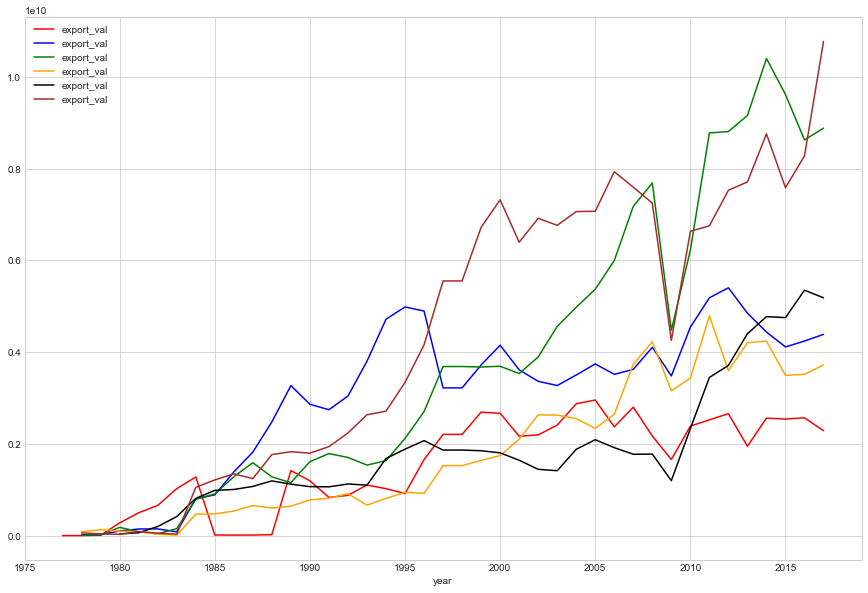

In [17]:
fig1, ax1 = plt.subplots(figsize=(15,10))

can.plot(color='red',ax=ax1,label='Canada')
jpn.plot(color='blue',ax=ax1,label='Japan')
deu.plot(color='green',ax=ax1,label='Deu')
gbr.plot(color='orange',ax=ax1,label='Britain')
mex.plot(color='black',ax=ax1,label='Mexico')
usa.plot(color='brown',ax=ax1,label='USA')

plt.legend(ncol=1,loc='best')